In [34]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
import cftime 
import psutil
from src.LE_LoadAndMerge import *
import seaborn as sns

In [6]:
models = ['CanESM5','cesm_lens', 'MIROC6','MPI-ESM1-2-LR','EC-Earth3']
model = 'EC-Earth3'

In [5]:
url = 'https://storage.googleapis.com/cmip6/pangeo-cmip6.json'
raw_cat = intake.open_esm_datastore(url)

In [7]:
cat = raw_cat.search(
    experiment_id=['historical','ssp585'],
    variable_id='tas',
    table_id='day',
    source_id=model
)

In [8]:
cat

,unique
activity_id,2
institution_id,1
source_id,1
experiment_id,2
member_id,72
table_id,1
variable_id,1
grid_label,1
zstore,129
dcpp_init_year,0


In [9]:
dset = cat.to_dataset_dict(zarr_kwargs={'consolidated':True}, storage_options={"anon": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/envs/analog

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/indexing.py:1232: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/indexing.py:1232: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slic

In [11]:
dset.keys()

dict_keys(['ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp585.day.gr', 'CMIP.EC-Earth-Consortium.EC-Earth3.historical.day.gr'])

In [13]:
keys = sorted(dset.keys())
hist = dset[keys[0]]
future = dset[keys[1]]

In [14]:
hist

<xarray.Dataset>
Dimensions:    (lat: 514, time: 60266, bnds: 2, lon: 512, member_id: 71)
Coordinates:
  * lat        (lat) float64 -89.46 -89.46 -88.77 -88.77 ... 88.77 89.46 89.46
  * time       (time) datetime64[ns] 1849-12-31T12:00:00 ... 2014-12-31T12:00:00
    height     float64 ...
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(514, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(512, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(30134, 1), meta=np.ndarray>
  * member_id  (member_id) <U10 'r9i1p1f1' 'r6i1p1f1' ... 'r19i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 128, 514, 512), meta=np.ndarray>
Attributes: (12/53)
    activity_id:               CMIP
    history:                   2019-07-04T00:21:11Z ; CMOR rewrote data to be...
    realm:                     atmos
    data_specs_version:        01.00.28
    parent_sub_experiment_id:  no parent
    sub_experiment_id:         none
    ...                        ...
    parent_activity_id:        CMIP
    license:                   CMIP6 model data produced by EC-Earth-Consorti...
    intake_esm_varname:        ['tas']
    parent_variant_label:      r1i1p1f1
    experiment_id:             historical
    intake_esm_dataset_key:    CMIP.EC-Earth-Consortium.EC-Earth3.historical....

In [15]:
future

<xarray.Dataset>
Dimensions:    (lat: 258, bnds: 2, lon: 512, member_id: 58, time: 31411)
Coordinates:
  * lat        (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
    height     float64 ...
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(258, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(512, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(15706, 2), meta=np.ndarray>
  * member_id  (member_id) <U10 'r6i1p1f1' 'r9i1p1f1' ... 'r4i1p1f1' 'r3i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 128, 258, 512), meta=np.ndarray>
Attributes: (12/49)
    activity_id:                        ScenarioMIP
    history:                            2019-07-10T07:03:45Z ; CMOR rewrote d...
    realm:                              atmos
    data_specs_version:                 01.00.30
    sub_experiment_id:                  none
    latest_applied_cmor_fixer_version:  v3.0
    ...                                 ...
    parent_activity_id:                 CMIP
    license:                            CMIP6 model data produced by EC-Earth...
    intake_esm_varname:                 ['tas']
    parent_variant_label:               r3i1p1f1
    experiment_id:                      ssp585
    intake_esm_dataset_key:             ScenarioMIP.EC-Earth-Consortium.EC-Ea...

In [20]:
USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='tas', granularity='day', lat=41.3, lon=-72.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_41.3_287.5.zarr


In [21]:
USeast.hist

<xarray.Dataset>
Dimensions:    (member: 71, time: 34699, model: 5)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
Data variables:
    tas        (model, member, time) float32 5.104 3.648 -2.4 ... 11.62 5.663
Attributes: (12/49)
    CCCma_model_hash:           Unknown
    CCCma_parent_runid:         p2-pictrl
    CCCma_pycmor_hash:          33c30511acc319a98240633965a04ca99c26427e
    Conventions:                CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:  1850:01:01:00
    activity_id:                CMIP
    ...                         ...
    table_info:                 Creation Date:(20 February 2019) MD5:374fbe5a...
    title:                      CanESM5 output prepared for CMIP6
    tracking_id:                hdl:21.14100/13a818c0-52d1-48e6-b6f5-482ea59b...
    variable_id:                tas
    version:                    v20190429
    version_id:                 v20190429

In [62]:
hist = USeast.hist.tas
future = USeast.future.tas

In [63]:
# conseq_days = 5
# hist = hist.rolling(time=conseq_days, center=True).mean()
# future = future.rolling(time=conseq_days, center=True).mean()

In [64]:
# 1 in 10 year event
return_period = 10

In [65]:
expected_events = len(hist.time) / 365.25 / return_period
q = 1 - expected_events / len(hist.time)
q

0.9997262149212868

In [75]:
expected_events

9.500068446269678

In [66]:
quantile = hist.quantile(q, ('time','member'))
quantile

<xarray.DataArray 'tas' (model: 5)>
array([30.20269121, 27.84597983, 29.73494744, 26.08608766, 28.75353705])
Coordinates:
  * model     (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR' 'EC-Earth3'
    quantile  float64 0.9997

In [67]:
occurance_hist = hist > quantile
occurance_hist = occurance_hist.where(np.isfinite(hist), np.NaN)
occurance_future = future > quantile
occurance_future = occurance_future.where(np.isfinite(future), np.NaN)

In [68]:
occurance_hist

<xarray.DataArray 'tas' (model: 5, member: 71, time: 34699)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 0.9997

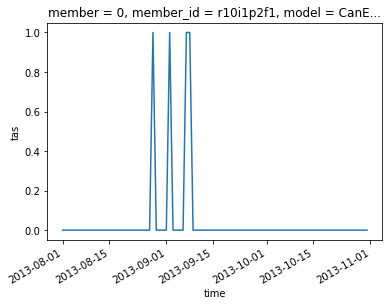

In [69]:
occurance_hist.isel(model=0, member=0).sel(time=slice('2013-08', '2013-10')).plot()

In [70]:
non_conseq_events = (occurance_hist.astype('int').diff('time') == 1).sum('time').where(
                    np.isfinite(hist.isel(time=20)), np.NaN
                )

In [71]:
occurance_hist.isel(model=0).sum().values

array(475.)

In [72]:
non_conseq_events.isel(model=0).sum().values

array(381.)

In [76]:
# 10 year average occurrance
occurance = occurance_future.resample(time='AS').mean().rolling(
    time=1, center=True).mean()

In [77]:
occurance

<xarray.DataArray 'tas' (model: 5, member: 58, time: 86)>
array([[[0.00273973, 0.        , 0.        , ..., 0.2630137 ,
         0.23561644, 0.24657534],
        [0.        , 0.00273973, 0.        , ..., 0.18630137,
         0.28493151, 0.30136986],
        [0.        , 0.        , 0.        , ..., 0.18356164,
         0.25753425, 0.23013699],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.00273973, 0.        , 0.        , ..., 0.1890411 ,
         0.22465753, 0.20821918],
        [0.00547945, 0.00547945, 0.00273973, ..., 0.15616438,
         0.20821918, 0.20821918],
        [0.        , 0.        , 0.        , ..., 0.21643836,
         0.18356164, 0.20547945],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.        , 0.        , 0.        , ..., 0.10136986,
         0.16438356, 0.09863014],
        [0.        , 0.        , 0.        , ..., 0.12054795,
         0.15068493, 0.15890411],
        [0.        , 0.        , 0.        , ..., 0.14794521,
         0.09315068, 0.21369863],
        ...,
        [0.00821918, 0.00819672, 0.        , ..., 0.11780822,
         0.10958904, 0.19178082],
        [0.        , 0.        , 0.        , ..., 0.11232877,
         0.14520548, 0.11232877],
        [0.00821918, 0.        , 0.00273973, ..., 0.12876712,
         0.09041096, 0.13424658]]])
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (model, member) object 'r16i1p2f1' 'r10i1p1f1' ... 'r3i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 0.9997

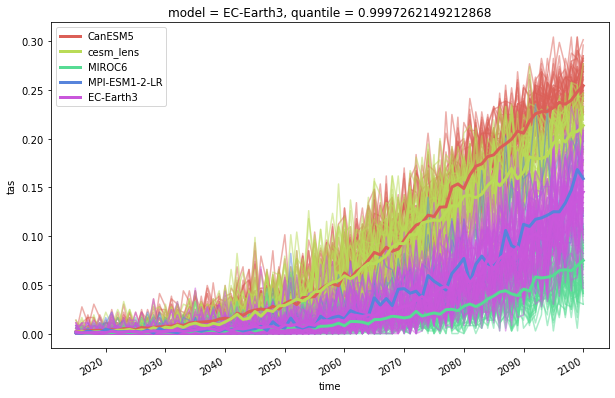

In [78]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("hls", len(occurance.model))
for i, model in enumerate(occurance.model):
    m = occurance.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

In [79]:
I = occurance.var('member').mean('model')

In [80]:
M = occurance.mean('member').var('model')

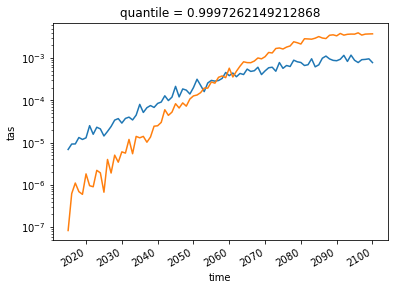

In [81]:
I.plot()
M.plot()
plt.yscale('log')

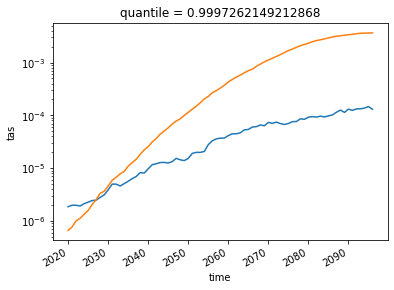

In [38]:
I.plot()
M.plot()
plt.yscale('log')